# import pkgs

In [1]:
import pandas as pd
import glob
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
# plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号
%matplotlib inline

# plot learning curve

In [3]:
files = glob.glob('*s64/*/*.csv')
files

['densent3d121_datas_img128_bs16_s64\\version_0\\metrics.csv',
 'mc3_18_datas_img128_bs8_s64\\version_0\\metrics.csv',
 'r2plus1d_18_datas_img128_bs8_s64\\version_0\\metrics.csv',
 'r3d_18_datas_img128_bs8_s64\\version_0\\metrics.csv',
 'resnet3d101_datas_img128_bs16_s64\\version_0\\metrics.csv']

In [4]:
df = pd.DataFrame()
for file in files:
    name  = file.split('_')[0]
    data = pd.read_csv(file)
    valid_acc = data['valid_acc_1']
    valid_acc = valid_acc[valid_acc>0]
    df[name] = valid_acc.values[:150]
df.tail()

,densent3d121,mc3,r2plus1d,r3d,resnet3d101
145,86.500,82.375,80.375,81.875000,83.875
146,86.375,82.625,78.875,80.208333,83.125
147,86.125,82.500,79.000,81.125000,84.250
148,86.750,83.125,80.000,81.625000,82.625
149,86.625,82.500,79.870,82.125000,84.125


In [5]:
SMALL_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

D:\Continuum\anaconda3\envs\py36\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


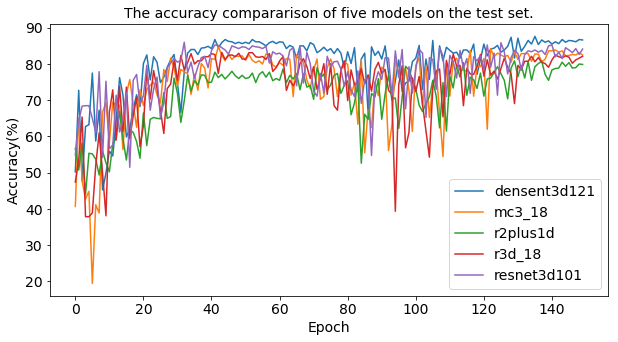

In [6]:
fig, ax = plt.subplots(1,figsize=(10,5))
indices = np.arange(150)
for idx in range(5):
    d = df.values[:,idx]
    label = df.columns[idx]
    if label in ['mc3', 'r3d']: label+='_18'
    ax.plot(indices, d, label=label)
ax.set_xlabel('Epoch', )
ax.set_ylabel('Accuracy(%)', )
ax.set_title('The accuracy compararison of five models on the test set.')
ax.legend()
fig.show()

# plot confusion matrix

In [35]:
from sklearn import metrics
import seaborn as sn
import matplotlib.cm as cm

In [16]:
files = glob.glob("*/*/predictions.npy")
files

['mc3_18_datas_img128_bs8_s64\\version_0\\predictions.npy',
 'r2plus1d_18_datas_img128_bs8_s64\\version_0\\predictions.npy',
 'r3d_18_datas_img128_bs8_s64\\version_0\\predictions.npy',
 'resnet3d101_datas_img128_bs16_s64\\version_0\\predictions.npy']

In [17]:
gt = np.load('./mc3_18_datas_img128_bs8_s64/version_0/gt_labels.npy')

In [19]:
preds = {}
for file in files:
    name = file.split('_')[0]
    if name in ['mc3','r3d']: name += '_18'
    preds[name] = np.load(file)
    print(f"====={name}======")
    print(metrics.classification_report(gt,preds[name].argmax(1),digits=4))

=====mc3_18======
              precision    recall  f1-score   support

           0     0.8562    0.8449    0.8505       303
           1     0.8834    0.8278    0.8547       302
           2     0.7870    0.8808    0.8313       193

    accuracy                         0.8471       798
   macro avg     0.8422    0.8512    0.8455       798
weighted avg     0.8498    0.8471    0.8474       798

=====r2plus1d======
              precision    recall  f1-score   support

           0     0.8261    0.7525    0.7876       303
           1     0.7837    0.8278    0.8052       302
           2     0.8227    0.8653    0.8434       193

    accuracy                         0.8083       798
   macro avg     0.8108    0.8152    0.8121       798
weighted avg     0.8092    0.8083    0.8077       798

=====r3d_18======
              precision    recall  f1-score   support

           0     0.8301    0.8548    0.8423       303
           1     0.8121    0.8444    0.8279       302
           2     0.

In [121]:
def plot_confusion_matrix(numx, numy, gt, preds, size_scale=5, fontsize=14):
    figsize = (numy*size_scale,numx*size_scale)
    fig,axes = plt.subplots(1,4,figsize=figsize)
    for idx, name in enumerate(preds):
        ax = axes[idx]
        pred = preds[name]
        cfm = metrics.confusion_matrix(gt, pred.argmax(1))
        h,w=cfm.shape
        ax.set_aspect(1)
        im = ax.imshow(cfm,cmap='Oranges')
        cbar = ax.figure.colorbar(im, ax=ax)
        cbar.ax.set_ylabel('', rotation=-90, va="bottom")
        ax.set_title(name,fontdict={'fontsize':fontsize})
        ax.set_xticks(np.arange(3))
        ax.set_yticks(np.arange(3))
        ax.set_xticklabels(['CP', 'NCP', 'Normal'],fontsize=fontsize-2)
        ax.set_yticklabels(['CP', 'NCP', 'Normal'],fontsize=fontsize-2)
        for i in range(h):
            for j in range(w):
                ax.text(j,i,cfm[i,j],ha='center',va='center',color='black',fontsize=fontsize)

    # fig.tight_layout()
    fig.show()
    axes

D:\Continuum\anaconda3\envs\py36\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


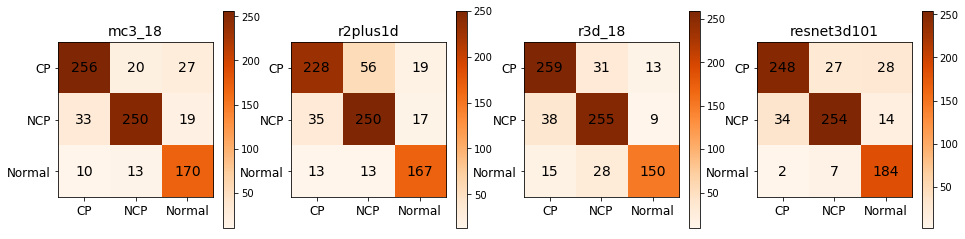

In [122]:
plot_confusion_matrix(1,4, gt, preds,4)

# plot roc curve

In [102]:
from sklearn import metrics
import seaborn as sn
import matplotlib.cm as cm

In [103]:
files = glob.glob("*/*/predictions.npy")
files

['mc3_18_datas_img128_bs8_s64\\version_0\\predictions.npy',
 'r2plus1d_18_datas_img128_bs8_s64\\version_0\\predictions.npy',
 'r3d_18_datas_img128_bs8_s64\\version_0\\predictions.npy',
 'resnet3d101_datas_img128_bs16_s64\\version_0\\predictions.npy']

In [104]:
gt = np.load('./mc3_18_datas_img128_bs8_s64/version_0/gt_labels.npy')

In [105]:
preds = {}
for file in files:
    name = file.split('_')[0]
    if name in ['mc3','r3d']: name += '_18'
    preds[name] = np.load(file)

In [117]:
def plot_one_model_roc(gt, pred,name):
    fpr = {}
    tpr = {}
    roc_auc = {}
    gt_onehot = np.eye(3)[gt]
    gt_onehot
    for i in range(3):
        fpr[i],tpr[i],_ = metrics.roc_curve(gt_onehot[:,i],pred[:,i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    cls_map = {'0':'CP','1':'NCP','2':'Normal'}
    for i in range(3):
        plt.plot(fpr[i], tpr[i], label=f"ROC curve of class {cls_map[str(i)]} (area={roc_auc[i]:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    # plt.grid()
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver operating characteristic to {name}')
    plt.legend(loc="lower right")
    # plt.tight_layout()
    plt.show()

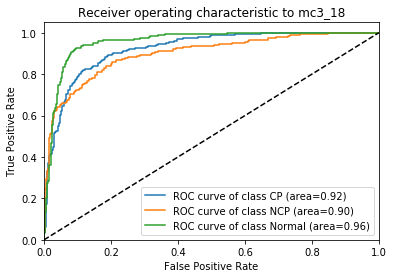

In [118]:
plot_model_roc(gt, preds['mc3_18'], 'mc3_18')

In [152]:
def plot_models_roc(numx, numy, gt, preds, size_scale=5, fontsize=14):
    figsize = (numy*size_scale,numx*size_scale)
    fig, axes = plt.subplots(numx,numy,figsize=figsize)
    for m in range(numx):
        for n in range(numy):
            ax = axes[m][n]
            fpr = {}
            tpr = {}
            roc_auc = {}
            gt_onehot = np.eye(3)[gt]
            idx = (m)*numy + n
            name = list(preds.keys())[idx]
            pred = preds[name]
            for i in range(3):
                fpr[i],tpr[i],_ = metrics.roc_curve(gt_onehot[:,i],pred[:,i])
                roc_auc[i] = metrics.auc(fpr[i], tpr[i])

            cls_map = {'0':'CP','1':'NCP','2':'Normal'}
            for i in range(3):
                ax.plot(fpr[i], tpr[i], label=f"ROC curve of class {cls_map[str(i)]} (area={roc_auc[i]:.2f})")
            ax.plot([0, 1], [0, 1], 'k--')
            # plt.grid()
            ax.set_xlim([0.0, 1.0])
            ax.set_ylim([0.0, 1.05])
            ax.set_xlabel('False Positive Rate')
            ax.set_ylabel('True Positive Rate')
            ax.set_title(f'Receiver operating characteristic to {name}')
            ax.legend(loc="lower right")
            # plt.tight_layout()
    plt.show()

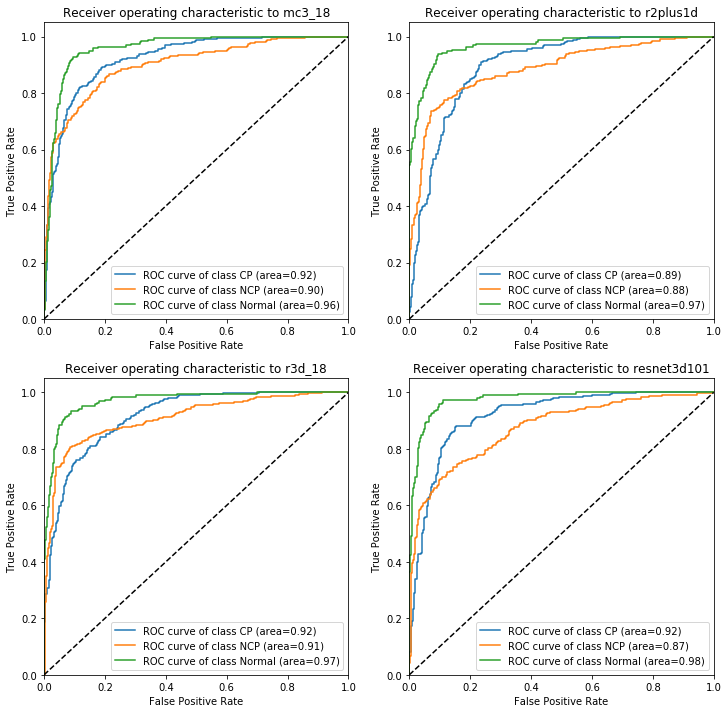

In [155]:
plot_models_roc(2,2,gt,preds,6)